# Predictive Analytics : Bank Customer Churn Prediction
___

## Business Understanding
___

### Problem Statement
___
- Bagaimana cara memprediksi pelanggan bank yang cenderung akan churn (berhenti menggunakan layanan) berdasarkan data historis nasabah?
- Faktor-faktor apa saja (misalnya skor kredit, usia, saldo, jumlah produk, status keanggotaan aktif, estimasi gaji) yang paling memengaruhi keputusan pelanggan untuk churn?

### Goals
___
- Mengembangkan model prediksi churn pelanggan yang akurat untuk mengidentifikasi nasabah berisiko tinggi.
- Memberikan pemahaman tentang hubungan antara karakteristik nasabah dan perilakunya dengan kemungkinan churn.
- Membantu bank dalam merancang strategi retensi pelanggan yang proaktif dan efektif.

### Solution Statements
___
- Membangun model machine learning (misalnya Random Forest Classifier, Logistic Regression, atau SVM) untuk memprediksi probabilitas atau kelas churn (0: tidak churn, 1: churn).
- Melakukan analisis fitur dari dataset (yang mencakup Credit Score, Country, Gender, Age, Balance, dll.) untuk mengetahui fitur-fitur mana yang paling signifikan dalam menentukan churn.
- Menggunakan evaluasi model seperti Accuracy, Precision, Recall, F1-Score, dan ROC AUC untuk mengukur performa model dan memilih pendekatan terbaik.

## Data Understanding
___
Dataset Bank Customer Churn Prediction berasal dari Kaggle, berisi informasi historis nasabah bank yang digunakan untuk memprediksi apakah mereka akan churn. Dataset ini mencakup berbagai atribut seperti skor kredit, negara, jenis kelamin, usia, masa keanggotaan (tenure), saldo rekening, jumlah produk bank yang dimiliki, status kartu kredit, status keanggotaan aktif, dan estimasi gaji. Target variabelnya adalah 'churn' (1 jika nasabah churn, 0 jika tidak).
Sumber didapatkan dari link berikut [(Sumber Data)](https://www.kaggle.com/datasets/bhuviranga/customer-churn-data)

### Data Loading
___
Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_raw = pd.read_csv("https://raw.githubusercontent.com/Marsello-or/Submission1_MachineLearningTerapan/refs/heads/main/Bank%20Customer%20Churn%20Prediction.csv")

data_raw

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Exploratory Data Analysis
___
Proses analisis data yang ada di dalam dataset, proses eksplorasi dilakukan untuk dapat melihat persebaran dan karakteristik data yang akan digunakan untuk dasar pembuatan model
```

In [3]:
data_raw.shape

(10000, 12)

In [4]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


___
Output di atas menunjukkan bahwa dataset memiliki 10000 data dan 12 kolom.
- Terdapat 2 tipe data float64
- Terdapat 8 tipe data int64
- Terdapat 2 tipe data object (country, gender)
```

In [5]:
data_raw.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


---
Dilakukan identifikasi karakeristik secara statistik dengan menggunakan fungsi describe
- Count adalah jumlah sampel pada dataset yang digunakan
- Mean adalah nilai rata-rata
- Std adalah standar deviasi
- Min adalah nilai minimum yang ada pada masing-masing kolom data
- 25% menunjukkan kuartil pertama
- 50% menunjukkan kuartil kedua
- 75% menunjukkan kuartil ketiga
- Max adalah nilai maksimum pada kolom

### Checking Missing and Duplicated Value
---

In [6]:
print("Total Data Teduplikasi :", data_raw.duplicated().sum())

Total Data Teduplikasi : 0


In [7]:
data_raw.isnull().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


---
Terlihat dari fungsi analisis di atas bahwa dataset tidak memiliki data duplikat dan missing value. Oleh karena itu, proses dapat dilanjutkan kepada analisis dan proses visualisasi data.

### Boxplot Visualization

Pembagian feature pada dataset menjadi categorical dan numerical feature
___

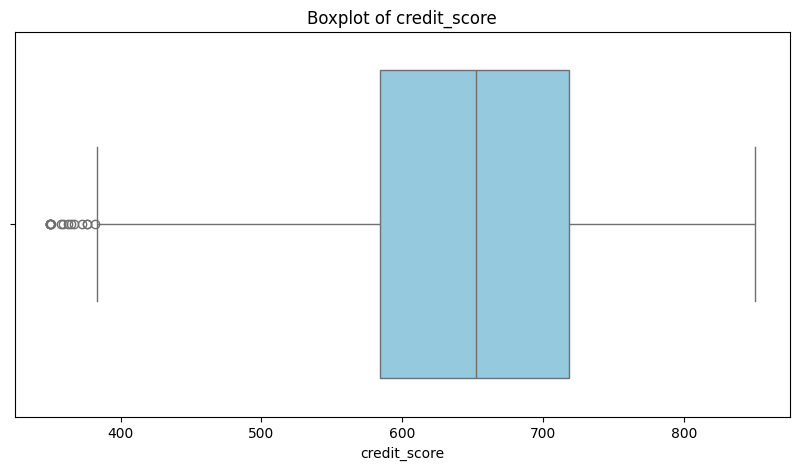

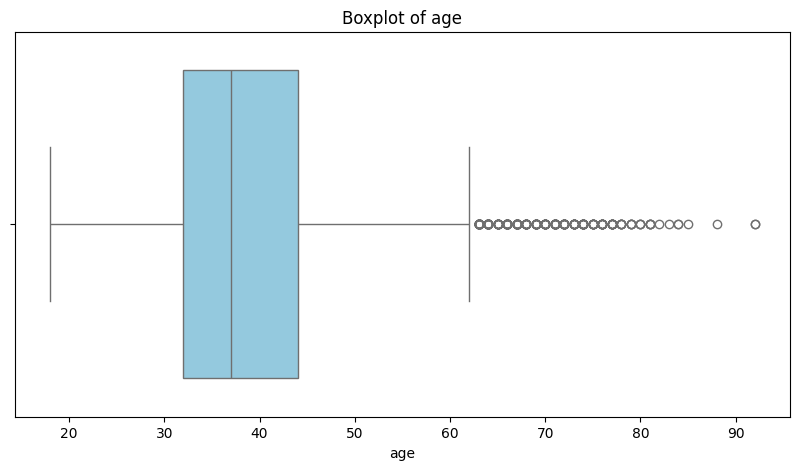

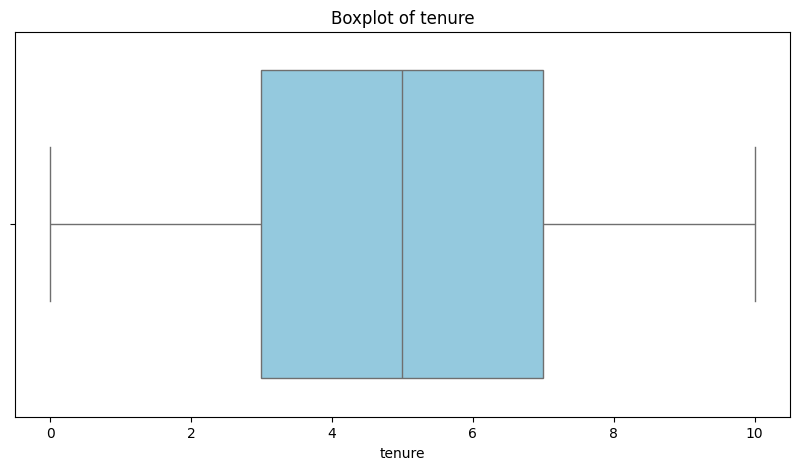

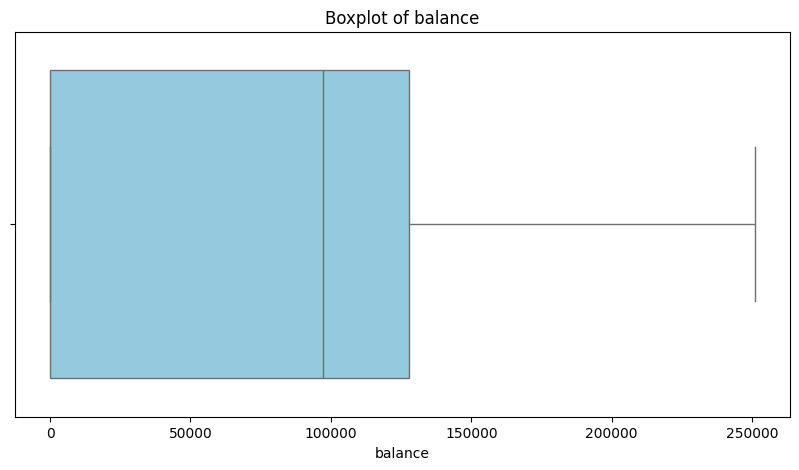

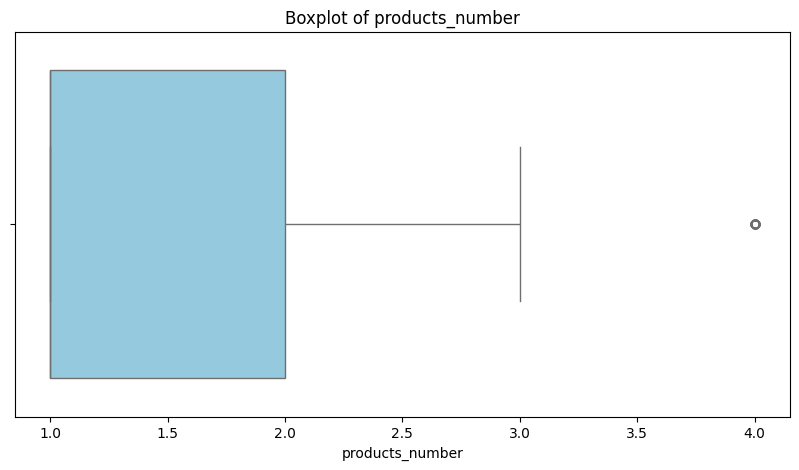

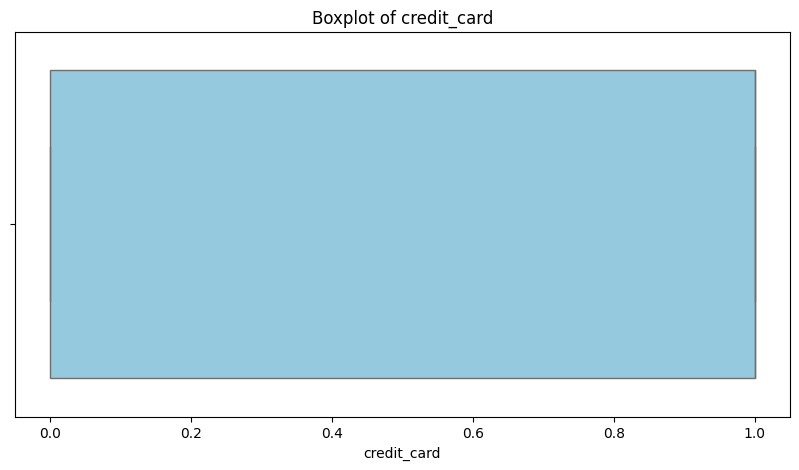

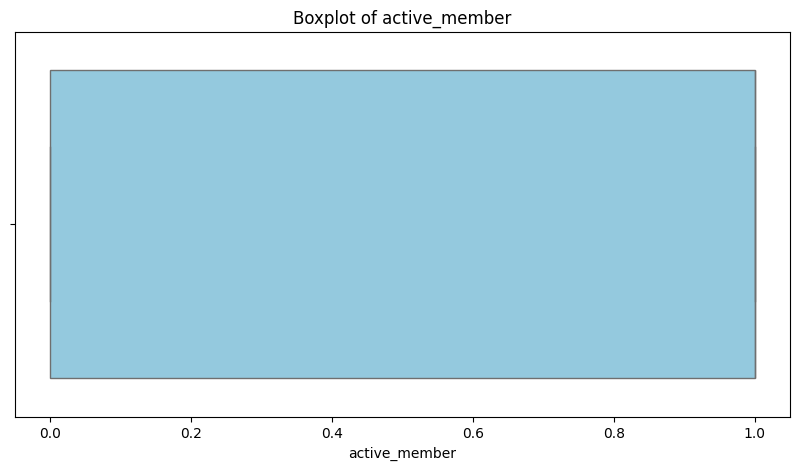

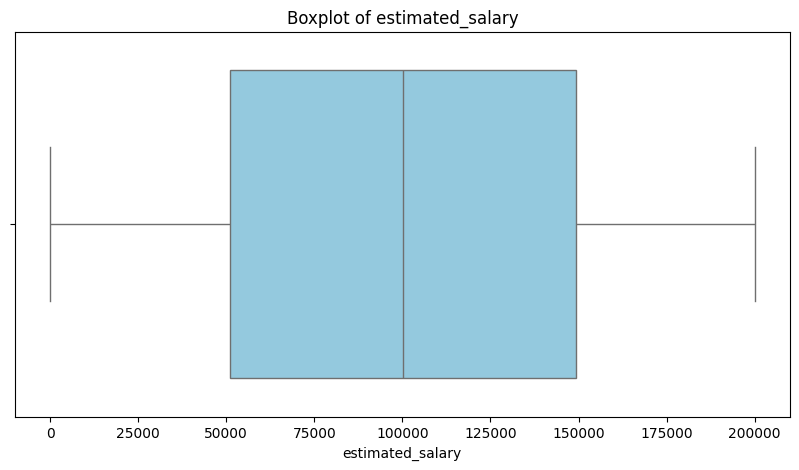

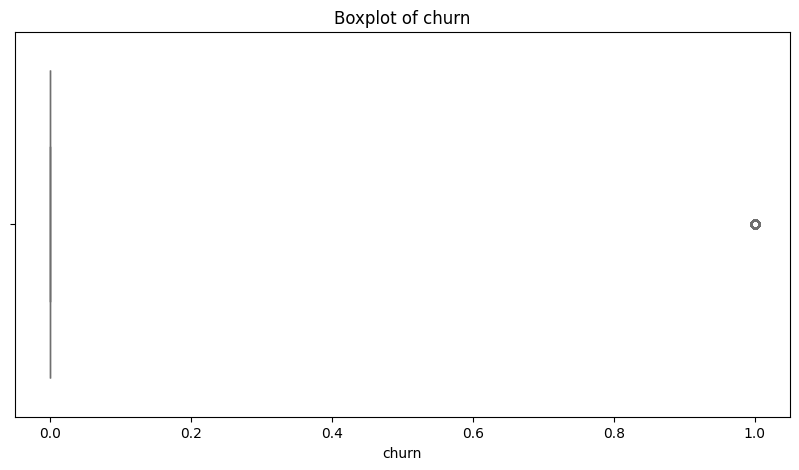

In [8]:
categorical_features = ['country',
                        'gender']

numerical_features = ['credit_score',
                      'age',
                      'tenure',
                      'balance',
                      'products_number',
                      'credit_card',
                      'active_member',
                      'estimated_salary',
                      'churn'] # churn juga numerik (binary)

for num in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=data_raw, x=num, color='skyblue')
    plt.title(f'Boxplot of {num}')
    plt.xlabel(num)
    plt.show()

Untuk deskripsi dan detail box plot dapat dilihat sebagai berikut :
- `credit_score`: Rata-rata skor kredit sekitar 650. Sebagian besar data antara 584 hingga 718. Terdapat outlier di sisi bawah (skor sangat rendah).
- `age`: Rata-rata usia sekitar 38 tahun. Sebagian besar data antara 32 hingga 44 tahun. Terdapat outlier di sisi atas (usia sangat tua).
- `tenure`: Rata-rata masa keanggotaan sekitar 5 tahun. Sebagian besar data antara 3 hingga 7 tahun. Distribusi cukup simetris.
- `balance`: Rata-rata saldo rekening sekitar 76.485. Sebagian besar data antara 0 hingga 127.644. Ada banyak nasabah dengan saldo 0 (outlier ekstrim di sisi bawah atau nilai nol yang dominan).
- `products_number`: Rata-rata jumlah produk sekitar 1.5. Mayoritas nasabah memiliki 1 atau 2 produk. Terdapat outlier di sisi atas (nasabah dengan 3 atau 4 produk).
- `credit_card`: Variabel biner (0 atau 1). Mayoritas memiliki kartu kredit.
- `active_member`: Variabel biner (0 atau 1). Mayoritas adalah anggota aktif.
- `estimated_salary`: Rata-rata estimasi gaji sekitar 100.000. Sebagian besar data tersebar merata, tidak ada outlier yang jelas di luar rentang, distribusi cukup simetris.
- `churn`: Variabel biner (0 atau 1). Target. Mayoritas nasabah tidak churn.

## Exploratory Data Analysis - Univariate
---

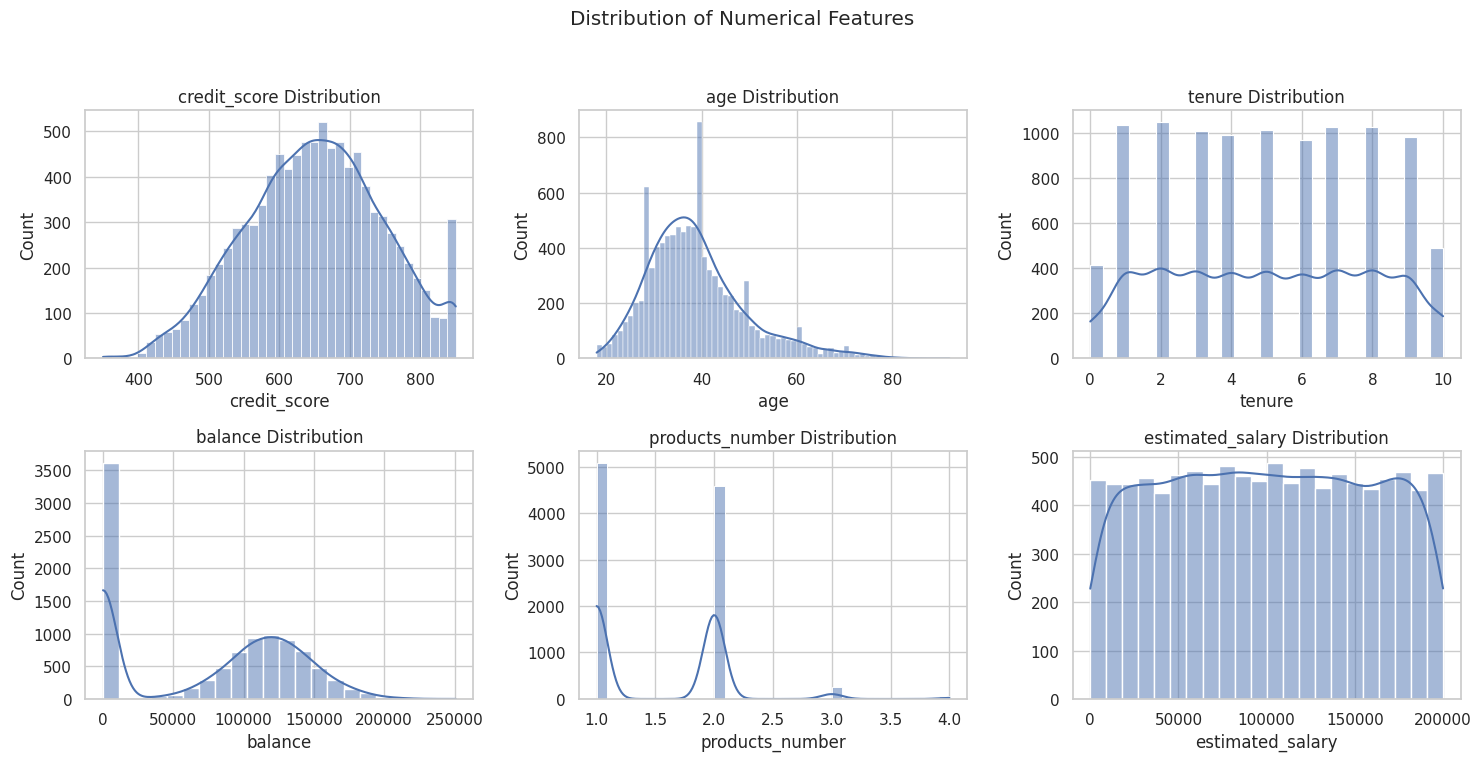

In [9]:
# Univariate Analysis - Numerical Feature
# Kita akan fokus pada fitur numerik kontinu/diskrit yang bervariasi
numerical_features_to_plot_dist = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']

sns.set(style="whitegrid")
n_cols = 3
n_rows = (len(numerical_features_to_plot_dist) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
fig.suptitle('Distribution of Numerical Features')

axes = axes.flatten()

# Loop through the numerical features and plot them
for i, num in enumerate(numerical_features_to_plot_dist):
    sns.histplot(data_raw[num], kde=True, ax=axes[i])
    axes[i].set_title(f'{num} Distribution')

# Hide any unused subplots
for j in range(len(numerical_features_to_plot_dist), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

___
Berdasarkan hasil analisis dari plot distribusi feature numerical:
- `credit_score`, `age`, `tenure`, `estimated_salary`: Distribusi terlihat cukup simetris, mendekati normal atau seragam.
- `balance`: Terlihat sangat miring ke kanan (positively skewed) dengan konsentrasi besar di nilai nol, menunjukkan banyak nasabah tidak memiliki saldo atau saldo sangat rendah.
- `products_number`: Merupakan variabel diskrit, dengan distribusi yang menunjukkan mayoritas nasabah memiliki 1 atau 2 produk.
___

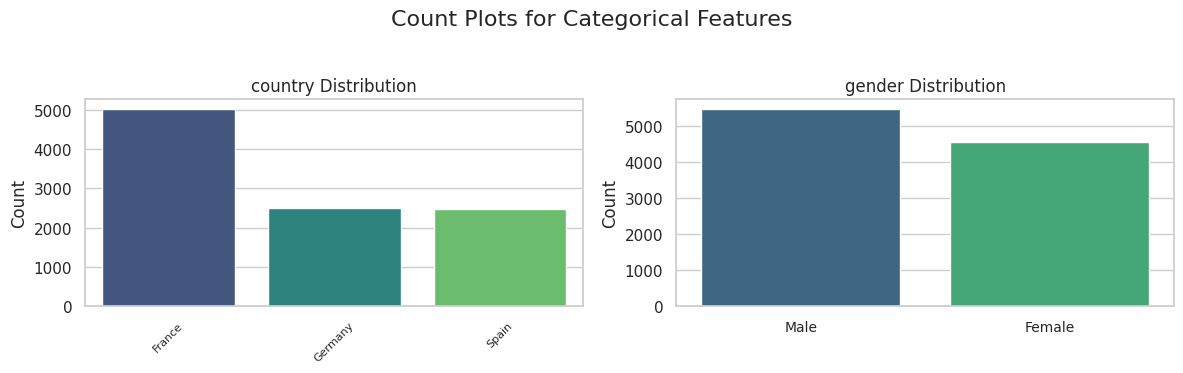

In [10]:
### Univariate Analysis - Categorical Feature

sns.set(style="whitegrid")

# Daftar fitur kategorikal Anda
categorical_features = ['country', 'gender']

# Tentukan jumlah baris dan kolom untuk subplots
n_cols = 2 # Kita akan tampilkan 2 kolom plot
n_rows = (len(categorical_features) + n_cols - 1) // n_cols

height_multiplier = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * height_multiplier))
fig.suptitle('Count Plots for Categorical Features', fontsize=16)

# Flatten array axes untuk iterasi yang lebih mudah
axes = axes.flatten()

# Loop melalui setiap fitur kategorikal dan buat countplot
for i, feature in enumerate(categorical_features):
    if i < len(axes):
        sns.countplot(data=data_raw, x=feature, ax=axes[i], palette='viridis', order=data_raw[feature].value_counts().index) # Gunakan data_raw langsung
        axes[i].set_title(f'{feature} Distribution')
        axes[i].set_xlabel('') # Kosongkan label x untuk kejelasan
        axes[i].set_ylabel('Count')

        if data_raw[feature].nunique() > 5 or feature in ['country']:
             axes[i].tick_params(axis='x', rotation=45, labelsize=8)
        else:
             axes[i].tick_params(axis='x', rotation=0, labelsize=10)

# Sembunyikan subplot yang tidak terpakai
for j in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

Berdasarkan grafik fitur kategorikal yang telah dibuat, berikut adalah deskripsinya:

**1. Country Distribution (Distribusi Negara):**
- Grafik ini menunjukkan mayoritas nasabah berasal dari 'France' (Prancis), diikuti oleh 'Germany' (Jerman) dan 'Spain' (Spanyol) dengan jumlah yang lebih sedikit namun seimbang antara keduanya.

**2. Gender Distribution (Distribusi Jenis Kelamin):**
- Grafik ini menunjukkan jumlah nasabah 'Male' (Laki-laki) sedikit lebih banyak dibandingkan 'Female' (Perempuan) dalam dataset.


# EDA - Multivariate Analysis
---

In [11]:
data_for_multivariate_analysis = data_raw.copy()

# --- Fitur numerik yang akan digunakan dalam korelasi dan scatter plot ---
# Tidak ada transformasi logaritmik, jadi gunakan nama kolom asli
numerical_features_for_corr_plot = [
    'credit_score',
    'age',
    'tenure',
    'balance', # Menggunakan 'balance' asli
    'products_number',
    'credit_card',
    'active_member',
    'estimated_salary',
    'churn' # Target
]

categorical_features_multi = ['country', 'gender']

## Scatter Plot (Numerical Features vs. Target Churn)

Karena 'churn' adalah variabel biner, scatter plot tradisional mungkin tidak terlalu informatif. Sebagai gantinya, kita bisa melihat distribusi fitur numerik untuk setiap kategori 'churn' menggunakan boxplot atau violin plot, atau langsung ke heatmap korelasi. Jika tetap ingin scatter plot, bisa melihat tren korelasi atau cluster. Untuk tujuan ini, kita akan membuat scatter plot numerik vs. churn, meskipun perlu diingat bahwa churn hanya memiliki dua nilai.
```


--- Scatter Plots: Numerical Features vs. Churn ---


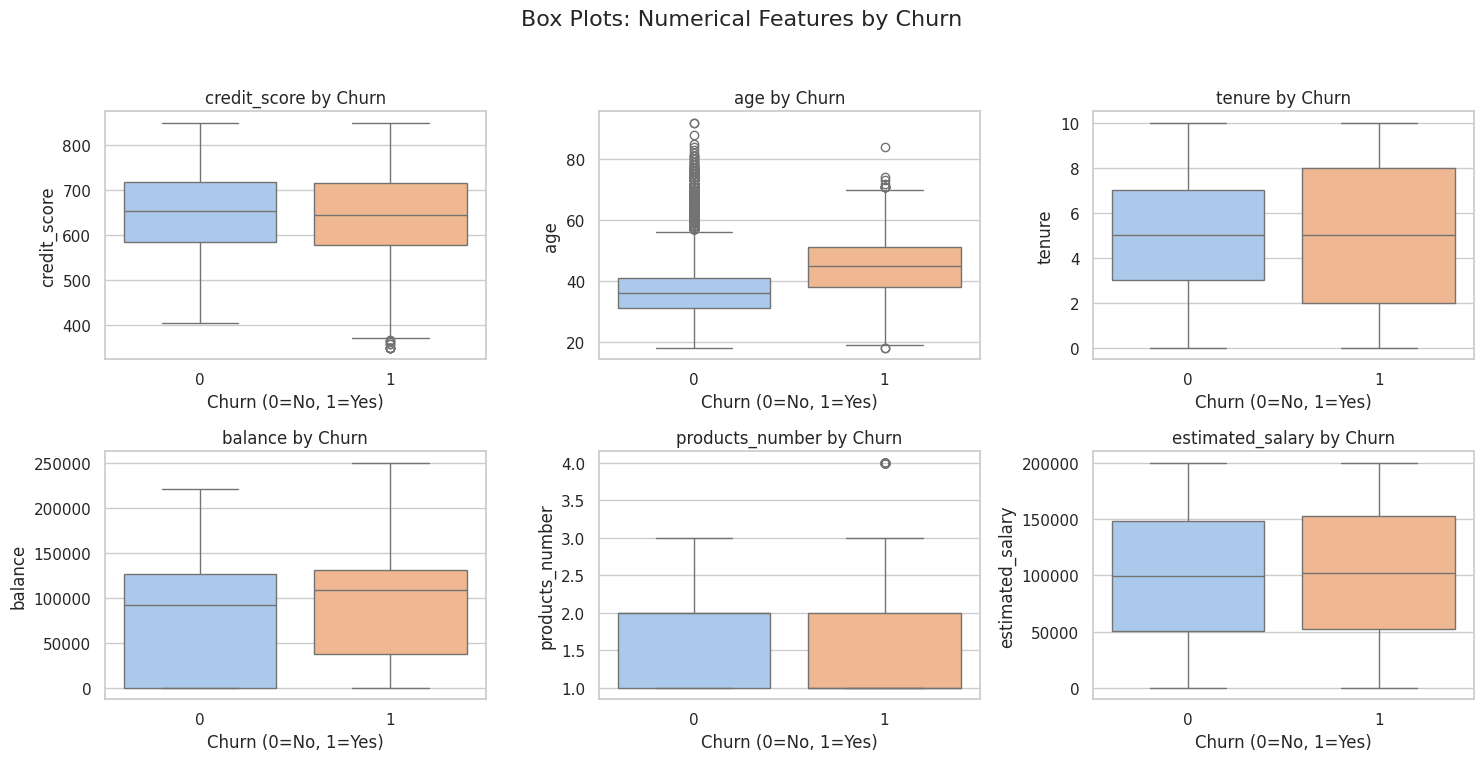

In [12]:
# Scatter Plots: Hubungan antara Fitur Numerik Lainnya dan Churn
print("\n--- Scatter Plots: Numerical Features vs. Churn ---")
features_for_scatter = [
    'credit_score',
    'age',
    'tenure',
    'balance', # Menggunakan 'balance' asli
    'products_number',
    'estimated_salary'
]

n_cols_scatter = 3
n_rows_scatter = (len(features_for_scatter) + n_cols_scatter - 1) // n_cols_scatter

fig_scatter, axes_scatter = plt.subplots(n_rows_scatter, n_cols_scatter, figsize=(n_cols_scatter * 5, n_rows_scatter * 4))
fig_scatter.suptitle('Box Plots: Numerical Features by Churn', fontsize=16) # Ganti judul menjadi Box Plots

axes_scatter = axes_scatter.flatten()

for i, feature in enumerate(features_for_scatter):
    if i < len(axes_scatter):
        sns.boxplot(data=data_for_multivariate_analysis, x='churn', y=feature, ax=axes_scatter[i], palette='pastel')
        axes_scatter[i].set_title(f'{feature} by Churn')
        axes_scatter[i].set_xlabel('Churn (0=No, 1=Yes)')
        axes_scatter[i].set_ylabel(feature)

for j in range(len(features_for_scatter), len(axes_scatter)):
    fig_scatter.delaxes(axes_scatter[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Analisis Hasil Scatter Plots (Multivariate Analysis)

Berdasarkan box plot yang menunjukkan hubungan antara fitur numerik dengan `churn` (target):

* **`credit_score` by Churn:** Rata-rata skor kredit tampak sedikit lebih rendah untuk nasabah yang churn (1) dibandingkan dengan yang tidak churn (0), meskipun ada banyak tumpang tindih. Ini menunjukkan bahwa skor kredit yang lebih rendah mungkin sedikit meningkatkan kemungkinan churn.
* **`age` by Churn:** Nasabah yang churn cenderung memiliki usia rata-rata yang lebih tinggi dan rentang usia yang lebih sempit dibandingkan nasabah yang tidak churn. Ini mengindikasikan bahwa nasabah yang lebih tua mungkin lebih mungkin untuk churn.
* **`tenure` by Churn:** Distribusi tenure terlihat cukup mirip antara nasabah churn dan tidak churn, menunjukkan bahwa masa keanggotaan mungkin bukan faktor pembeda yang kuat secara langsung.
* **`balance` by Churn:** Nasabah yang churn memiliki saldo rata-rata yang lebih tinggi dan variasi yang lebih besar dibandingkan nasabah yang tidak churn, yang sebagian besar memiliki saldo nol. Ini bisa mengindikasikan bahwa nasabah dengan saldo di rekening yang lebih tinggi lebih mungkin untuk churn, atau nasabah dengan saldo nol jarang churn.
* **`products_number` by Churn:** Nasabah yang churn cenderung memiliki jumlah produk yang lebih tinggi, terutama 3 atau 4 produk, dibandingkan nasabah yang tidak churn yang mayoritas memiliki 1 atau 2 produk. Ini menunjukkan kompleksitas dalam produk yang dimiliki mungkin terkait dengan churn.
* **`estimated_salary` by Churn:** Distribusi estimasi gaji terlihat sangat mirip antara nasabah churn dan tidak churn. Ini menunjukkan bahwa estimasi gaji mungkin tidak memiliki hubungan langsung yang kuat dengan churn.

## Correlation Heatmap
---

--- Heatmap Korelasi antar Fitur Numerik ---


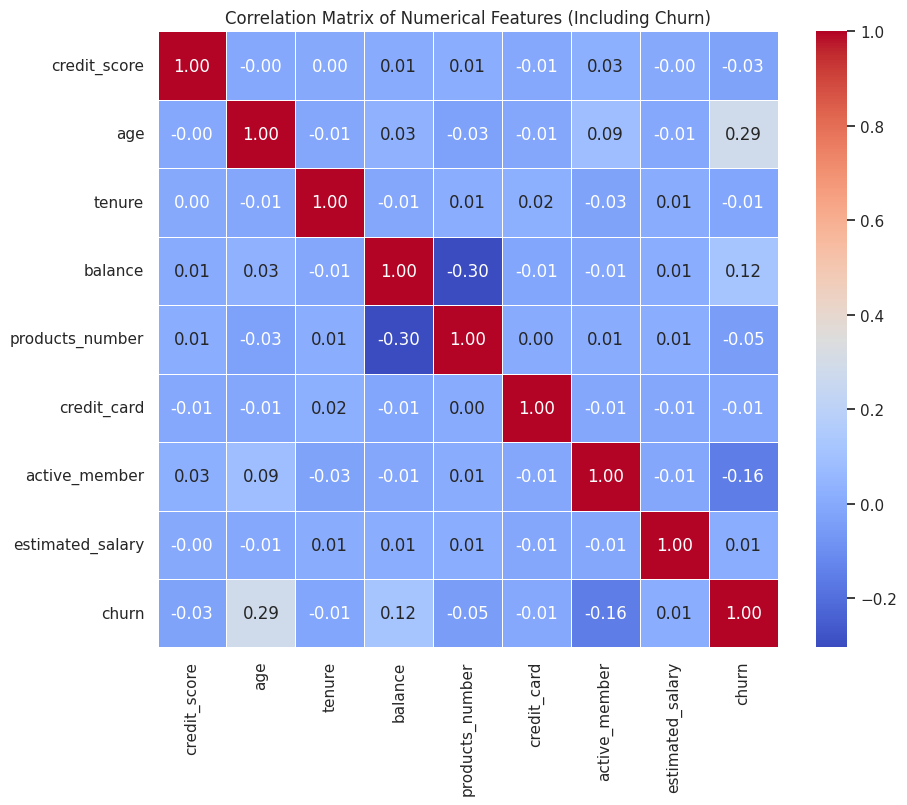

In [13]:
# --- Heatmap Korelasi antar Fitur Numerik ---
print("--- Heatmap Korelasi antar Fitur Numerik ---")
plt.figure(figsize=(10, 8))

# Pastikan hanya fitur numerik yang dipilih
numerical_features_for_heatmap = [
    'credit_score',
    'age',
    'tenure',
    'balance', # Menggunakan 'balance' asli
    'products_number',
    'credit_card',
    'active_member',
    'estimated_salary',
    'churn'
]

# Ambil subset data_for_multivariate_analysis yang relevan
correlation_data = data_for_multivariate_analysis[numerical_features_for_heatmap]
correlation_matrix = correlation_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features (Including Churn)')
plt.show()

### Interpretasi Umum Heatmap:

* **Warna Merah Cerah:** Menunjukkan korelasi positif yang kuat (mendekati +1).
* **Warna Biru Cerah:** Menunjukkan korelasi negatif yang kuat (mendekati -1).
* **Warna Pucat/Putih (mendekati 0):** Menunjukkan korelasi yang sangat lemah atau tidak ada korelasi linier.

### Analisis Korelasi Utama Terhadap 'Churn':

* **`churn` vs. `age` (Korelasi 0.29):** Terdapat korelasi positif moderat antara `churn` dan `age`. Ini mengindikasikan bahwa semakin tua usia nasabah, semakin tinggi kemungkinan mereka untuk churn.
* **`churn` vs. `products_number` (Korelasi -0.06):** Korelasi negatif yang sangat lemah. Awalnya mungkin tampak kontraintuitif, tapi bisa jadi nasabah dengan lebih sedikit produk lebih cenderung churn (atau sebaliknya). Namun, angkanya sangat kecil.
* **`churn` vs. `active_member` (Korelasi -0.16):** Korelasi negatif yang lemah. Nasabah yang lebih aktif cenderung tidak churn. Ini masuk akal.
* **`churn` vs. `balance` (Korelasi 0.12):** Korelasi positif yang lemah. Nasabah dengan saldo lebih tinggi cenderung churn. Ini mendukung pengamatan dari boxplot bahwa nasabah dengan saldo lebih tinggi lebih mungkin churn.
* **Fitur lainnya vs. `churn` (Korelasi Mendekati Nol):** `credit_score` (-0.03), `tenure` (-0.01), `credit_card` (-0.00), dan `estimated_salary` (0.01) memiliki korelasi yang sangat lemah dengan `churn`, menunjukkan bahwa variabel-variabel ini mungkin tidak memiliki hubungan linier yang kuat dengan churn.

### Analisis Korelasi Antar Fitur Lainnya:

* **`products_number` vs. `balance` (Korelasi -0.31):** Korelasi negatif moderat. Nasabah dengan lebih banyak produk cenderung memiliki saldo yang lebih rendah.
* **`credit_score` vs. `balance` (Korelasi 0.01) & `estimated_salary` vs. `balance` (Korelasi 0.01):** Korelasi sangat lemah, menunjukkan bahwa skor kredit atau gaji tidak berkorelasi linier dengan saldo rekening.
* **Tidak ada multikolinearitas ekstrem:** Berbeda dengan dataset sebelumnya, tidak ada pasangan fitur yang menunjukkan multikolinearitas ekstrem (korelasi > 0.9) yang memerlukan penghapusan segera. Ini berarti sebagian besar fitur dapat dipertahankan.

### Kesimpulan dari Heatmap Data Original:

* `age`, `active_member`, dan `balance` adalah fitur numerik dengan korelasi paling relevan terhadap `churn`, meskipun korelasinya masih tergolong lemah hingga moderat.
* Fitur lain memiliki korelasi linier yang sangat rendah dengan `churn`.
* Tidak ada masalah multikolinearitas parah antar fitur prediktor numerik.

##Data Preparation
Teknik yang digunakan:
- Filter Data : Melakukan filter terhadap data yang tidak perlu
- Penghapusan Outlier : Menghapus data dengan nilai yang ekstrem
- Label Encoding : Mengubah kategori menjadi tipe data numerik
- Feature Scaling: Melakukan penskalaan data numerik
- Train-test split data : Data dibagi menjadi 80% Train dan 20% Test
---

## Correlation Heatmap
---

In [14]:
data = data_raw.drop(['customer_id'], axis=1)
data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


dilakukan penghapusan data yang tidak perlu untuk dibuat model, customer_id dihapus dikarenakan tidak mengandung informasi yang berarti untuk menentukan churn dari customer


### Penghapusan Outlier
---

In [15]:
numerical_features_for_outlier_removal = [
    'credit_score',
    'age',
    'tenure',
    'balance',
    'products_number',
    'estimated_salary'
]

Q1 = data[numerical_features_for_outlier_removal].quantile(0.25)
Q3 = data[numerical_features_for_outlier_removal].quantile(0.75)
IQR = Q3 - Q1

# Filter outliers
data_cleaned = data[~((data[numerical_features_for_outlier_removal] < (Q1 - 1.5 * IQR)) | (data[numerical_features_for_outlier_removal] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Original data shape: {data.shape}")
print(f"Cleaned data shape: {data_cleaned.shape}")

Original data shape: (10000, 11)
Cleaned data shape: (9568, 11)


#### Analisis Hasil Penghapusan Outlier
___

-   Jumlah baris sebelum penghapusan outlier: 10000
-   Jumlah baris setelah penghapusan outlier: 9568
-   Jumlah baris yang dihapus (outlier): 432

Pada tahap ini, dilakukan filtering outliers yang bertujuan untuk menghapus outliers atau data-data yang berada di luar Interquartile Range (IQR) karena akan memberikan hasil yang signifikan kepada model jika tidak dihapus. Outlier dapat menyebabkan model menjadi bias atau kurang akurat dalam prediksinya, terutama pada model-model yang sensitif terhadap nilai ekstrem.

**Bagaimana Proses Penghapusan Outlier Dilakukan (Metode IQR):**

1.  **Pemilihan Kolom Numerik:**
    Kita memilih kolom numerik dari dataset `data` berdasarkan daftar `numerical_features_for_outlier_removal` (yaitu `credit_score`, `age`, `tenure`, `balance`, `products_number`, `estimated_salary`). Kolom-kolom ini adalah fitur-fitur numerik yang akan diperiksa dan dibersihkan dari outlier.

2.  **Perhitungan Kuartil dan IQR:**
    * **Q1 (Kuartil 1):** Nilai yang memisahkan 25% data terendah dari 75% data lainnya.
    * **Q3 (Kuartil 3):** Nilai yang memisahkan 75% data terendah dari 25% data tertinggi.
    * **IQR (Interquartile Range):** Rentang antara Q3 dan Q1. Ini mengukur sebaran nilai tengah dari data dan digunakan sebagai dasar untuk mengidentifikasi outlier.

3.  **Identifikasi dan Penghapusan Outlier:**
    * **Formula Batas Outlier:**
        * Nilai yang lebih kecil dari $Q1 - 1.5 \\times IQR$ dianggap Outlier Bawah.
        * Nilai yang lebih besar dari $Q3 + 1.5 \\times IQR$ dianggap Outlier Atas.
        Metode ini adalah aturan umum yang sering digunakan untuk mendeteksi outlier dalam distribusi data.
    * `((data[numerical_features_for_outlier_removal] < (Q1 - 1.5 * IQR)) | (data[numerical_features_for_outlier_removal] > (Q3 + 1.5 * IQR)))`: Bagian ini membuat mask boolean (True/False) untuk setiap nilai dalam kolom numerik, menandai `True` jika nilai tersebut adalah outlier.
    * `.any(axis=1)`: Mengevaluasi apakah ada kolom dalam *satu baris* yang memenuhi kriteria outlier (`True` di mask boolean). Jika setidaknya ada satu kolom di baris tersebut yang teridentifikasi sebagai outlier, maka seluruh baris tersebut akan dianggap sebagai outlier.
    * `~` (Negasi): Berguna untuk membalikkan hasil dari mask boolean. Ini berarti, jika suatu baris sebelumnya ditandai sebagai `True` (outlier), setelah negasi akan menjadi `False`. Dengan demikian, operasi ini memilih baris-baris yang *tidak* mengandung outlier.
    * Akhirnya, `data_cleaned = data[...]` membuat DataFrame baru yang hanya berisi baris-baris yang tidak teridentifikasi sebagai outlier.

Jumlah baris yang berkurang signifikan (dari 10000 menjadi 9568) menunjukkan bahwa dataset asli memiliki nilai ekstrem. Penghapusan outlier ini bertujuan untuk membersihkan data, menghasilkan distribusi yang lebih terkonsentrasi di sekitar nilai tengah, dan berpotensi meningkatkan performa model prediktif.
---

### Label Encoding

Untuk feature categorical seperti Crop, Season, dan State akan diubah menjadi angka menggunakan LabelEncoder()

In [16]:
# Tahap 4: Label Encoding untuk Fitur Kategorikal
print("\n--- Tahap 4: Label Encoding ---")

# Daftar fitur kategorikal yang akan di-encode
categorical_features_for_encoding = ['country', 'gender']

# Buat salinan DataFrame untuk encoding
data_encoded = data_cleaned.copy()

# Lakukan Label Encoding untuk setiap fitur kategorikal
encoder = LabelEncoder()
for feature in categorical_features_for_encoding:
    if feature in data_encoded.columns:
        print(f"Encoding fitur: {feature}")
        data_encoded[feature] = encoder.fit_transform(data_encoded[feature])
    else:
        print(f"Kolom '{feature}' tidak ditemukan di DataFrame.")

# Tampilkan beberapa baris pertama data setelah encoding
print("\nContoh Data Setelah Label Encoding:")
print(data_encoded.head())

# Tampilkan informasi data setelah encoding untuk memastikan tipe data berubah
print("\nInfo Data Setelah Label Encoding:")
data_encoded.info()


--- Tahap 4: Label Encoding ---
Encoding fitur: country
Encoding fitur: gender

Contoh Data Setelah Label Encoding:
   credit_score  country  gender  age  tenure    balance  products_number  \
0           619        0       0   42       2       0.00                1   
1           608        2       0   41       1   83807.86                1   
2           502        0       0   42       8  159660.80                3   
3           699        0       0   39       1       0.00                2   
4           850        2       0   43       2  125510.82                1   

   credit_card  active_member  estimated_salary  churn  
0            1              1         101348.88      1  
1            0              1         112542.58      0  
2            1              0         113931.57      1  
3            0              0          93826.63      0  
4            1              1          79084.10      0  

Info Data Setelah Label Encoding:
<class 'pandas.core.frame.DataFrame'>
Index

In [17]:
data_encoded.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


### Train-test Split Data
---

In [18]:
# Tahap 5: Train-test Split Data
print("\n--- Tahap 5: Train-test Split ---")

# Tentukan fitur (X) dan target (y)
# 'churn' adalah target variabel
X = data_encoded.drop(columns=['churn'])
y = data_encoded['churn']

# Lakukan train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # random_state untuk reproducibility, stratify untuk menjaga proporsi kelas target

# Tampilkan ukuran dataset hasil split
print(f"Ukuran dataset sebelum split: {data_encoded.shape[0]} baris")
print(f"Ukuran data training: {X_train.shape[0]} baris, {X_train.shape[1]} kolom")
print(f"Ukuran data testing: {X_test.shape[0]} baris, {X_test.shape[1]} kolom")
print(f"Ukuran target training: {y_train.shape[0]} baris")
print(f"Ukuran target testing: {y_test.shape[0]} baris")


--- Tahap 5: Train-test Split ---
Ukuran dataset sebelum split: 9568 baris
Ukuran data training: 7654 baris, 10 kolom
Ukuran data testing: 1914 baris, 10 kolom
Ukuran target training: 7654 baris
Ukuran target testing: 1914 baris


In [19]:
X

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [20]:
y

,churn
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


## Data Modeling
---

In [21]:
# Penskalaan fitur numerik sebelum modeling
scaler = StandardScaler()
# Fitur numerik yang perlu diskalakan (tanpa 'churn' dan 'customer_id')
numerical_features_to_scale = [
    'credit_score',
    'age',
    'tenure',
    'balance',
    'products_number',
    'estimated_salary'
]

# Pastikan hanya fitur numerik yang ada di X_train dan X_test yang diskalakan
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_features_to_scale] = scaler.fit_transform(X_train[numerical_features_to_scale])
X_test_scaled[numerical_features_to_scale] = scaler.transform(X_test[numerical_features_to_scale])

models = {
    "Logistic Regression": LogisticRegression(random_state=42, solver='liblinear'),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=42),
    "Random Forest Classifier": RandomForestClassifier(random_state=42, n_jobs=-1),
    "SVC": SVC(random_state=42, probability=True), # probability=True diperlukan untuk ROC AUC
    "K-Nearest Neighbors Classifier": KNeighborsClassifier()
}

Digunakan 5 model klasifikasi yaitu Logistic Regression, Decision Tree Classifier, Random Forest Classifier, Support Vector Classifier (SVC), dan K-Nearest Neighbors Classifier untuk mencari tahu model klasifikasi terbaik.

Ditambahkan `StandardScaler` untuk penskalaan fitur numerik. Ini penting karena algoritma seperti Logistic Regression, SVC, dan KNN sensitif terhadap skala fitur.

### Logistic Regression
Logistic Regression adalah algoritma klasifikasi linier yang digunakan untuk memprediksi probabilitas hasil biner (misalnya, churn atau tidak churn). Meskipun namanya "regresi", ini adalah model klasifikasi. Model ini menggunakan fungsi logistik (sigmoid) untuk memetakan prediksi ke probabilitas antara 0 dan 1.

**Parameter Umum (contoh default):**
* `penalty='l2'`: Jenis regularisasi yang digunakan.
* `solver='lbfgs'`: Algoritma untuk optimasi. `liblinear` sering digunakan untuk dataset kecil atau ketika ada regularisasi L1.
* `C=1.0`: Inverse dari kekuatan regularisasi. Nilai yang lebih kecil menunjukkan regularisasi yang lebih kuat.
* `random_state=None`: Seed untuk generator angka acak.

### Decision Tree Classifier
Decision Tree Classifier adalah algoritma yang membagi data ke dalam kelompok berdasarkan fitur dengan aturan "if-then" hingga mencapai keputusan klasifikasi. Setiap daun merepresentasikan kelas hasil.

**Parameter Umum (contoh default):**
* `criterion='gini'`: Kriteria untuk mengukur kualitas split (Gini impurity). Pilihan lain adalah `'entropy'`.
* `splitter='best'`: Memilih pemisahan terbaik.
* `max_depth=None`: Tidak ada batasan untuk kedalaman pohon.
* `min_samples_split=2`: Jumlah minimal sampel yang diperlukan untuk membagi node.
* `min_samples_leaf=1`: Jumlah minimal sampel per daun.
* `random_state=None`: Tidak ada seed tetap untuk reproduktivitas.

### Random Forest Classifier
Random Forest Classifier adalah algoritma ensemble berbasis pohon keputusan. Algoritma ini membangun banyak pohon keputusan secara acak pada subset data, kemudian menggabungkan hasil prediksi dari masing-masing pohon (biasanya dengan voting mayoritas) untuk menghasilkan prediksi akhir. Cocok untuk menangani hubungan non-linier dan mengurangi overfitting.

**Parameter Umum (contoh default):**
* `n_estimators=100`: Jumlah pohon dalam hutan.
* `criterion='gini'`: Kriteria untuk mengukur kualitas split.
* `max_depth=None`: Tidak ada batasan untuk kedalaman pohon.
* `min_samples_split=2`: Jumlah minimal sampel yang diperlukan untuk membagi node.
* `min_samples_leaf=1`: Jumlah minimal sampel per daun.
* `bootstrap=True`: Menggunakan pengambilan sampel ulang (bootstrap) untuk membuat setiap pohon.
* `random_state=None`: Tidak ada nilai seed tetap untuk reproduktivitas secara default.

### Support Vector Classifier (SVC)
Support Vector Classifier (SVC) adalah algoritma berbasis Support Vector Machine (SVM) yang digunakan untuk tugas klasifikasi. SVC berusaha menemukan hyperplane yang memiliki *margin* terbesar yang dapat memisahkan kelas-kelas data dengan jelas.

**Parameter Umum (contoh default):**
* `kernel='rbf'`: Kernel radial basis function (RBF) digunakan. Ini adalah kernel yang paling umum dan serbaguna.
* `gamma='scale'`: Parameter kernel yang dihitung berdasarkan jumlah fitur.
* `C=1.0`: Parameter regulasi (trade-off antara ukuran margin dan jumlah pelanggaran margin).
* `probability=False`: Jika `True`, akan mengaktifkan penghitungan probabilitas yang diperlukan untuk `predict_proba` dan metrik seperti ROC AUC.
* `random_state=None`: Tidak ada seed tetap untuk reproduksi.

### K-Nearest Neighbors (KNN) Classifier
K-Nearest Neighbors (KNN) Classifier adalah algoritma non-parametrik berbasis instance yang memprediksi kelas untuk data baru berdasarkan kelas mayoritas dari $k$ tetangga terdekatnya di ruang fitur.

**Parameter Umum (contoh default):**
* `n_neighbors=5`: Jumlah tetangga terdekat yang digunakan.
* `weights='uniform'`: Semua tetangga memiliki bobot yang sama saat voting. Pilihan lain adalah `'distance'` (tetangga terdekat memiliki bobot lebih besar).
* `algorithm='auto'`: Memilih algoritma terbaik (di antara `ball_tree`, `kd_tree`, dan `brute`) berdasarkan data.
* `p=2`: Nilai parameter jarak Minkowski ($2$ = Euclidean distance).

---

#### Kelebihan dan Kekurangan Model Klasifikasi

##### 1. **Logistic Regression**
* **Kelebihan**:
    * Sederhana, mudah diinterpretasikan, dan cepat untuk dilatih.
    * Memberikan probabilitas kelas, bukan hanya prediksi kelas.
    * Baik sebagai *baseline* kinerja.
* **Kekurangan**:
    * Hanya mampu menangkap hubungan linier antar variabel.
    * Asumsi independensi fitur.
    * Dapat berkinerja buruk pada dataset dengan hubungan non-linier kompleks.

##### 2. **Decision Tree Classifier**
* **Kelebihan**:
    * Mudah diinterpretasikan secara visual (jika pohon tidak terlalu dalam).
    * Mampu menangani fitur numerik dan kategorikal.
    * Dapat menangkap hubungan non-linier.
* **Kekurangan**:
    * Sangat rentan terhadap overfitting.
    * Kurang stabil; perubahan kecil pada data bisa menghasilkan struktur pohon yang sangat berbeda.

##### 3. **Random Forest Classifier**
* **Kelebihan**:
    * Memberikan akurasi tinggi dan mampu menangani hubungan non-linier kompleks.
    * Kurang rentan terhadap overfitting dibandingkan Decision Tree tunggal.
    * Dapat menangani data dengan dimensi tinggi dan mengatasi masalah multikolinearitas.
    * Mengurangi varians.
* **Kekurangan**:
    * Lebih kompleks dan kurang interpretable dibandingkan model linier.
    * Waktu komputasi bisa lebih tinggi, terutama dengan banyak pohon.

##### 4. **Support Vector Classifier (SVC)**
* **Kelebihan**:
    * Efektif dalam ruang berdimensi tinggi.
    * Mampu menangani hubungan non-linier melalui penggunaan kernel.
    * Cukup kuat terhadap outlier karena berfokus pada *support vectors*.
* **Kekurangan**:
    * Waktu komputasi bisa sangat tinggi untuk dataset besar.
    * Interpretasi model lebih sulit dibandingkan model linier atau pohon.
    * Pemilihan kernel dan parameter C, gamma sangat memengaruhi performa.

##### 5. **K-Nearest Neighbors (KNN) Classifier**
* **Kelebihan**:
    * Sederhana untuk dipahami dan diimplementasikan.
    * Non-parametrik, cocok untuk data dengan distribusi kompleks tanpa asumsi tentang data.
* **Kekurangan**:
    * Waktu prediksi bisa sangat lambat untuk dataset besar karena perlu menghitung jarak ke semua titik data pelatihan.
    * Sensitif terhadap skala fitur dan dimensi tinggi (curse of dimensionality).
    * Pemilihan nilai `k` sangat penting dan dapat memengaruhi kinerja secara signifikan.
---

## Evaluation
---

In [22]:
# --- Inisialisasi Stratified K-Fold Cross-Validation ---
n_splits = 5 # Anda bisa mengubah n_splits sesuai kebutuhan (misal 5 atau 10)
# StratifiedKFold menjaga proporsi kelas target di setiap fold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

print(f"\nMelakukan evaluasi model menggunakan {n_splits}-Fold Stratified Cross-Validation...")

results = {}

for model_name, model in models.items():
    print(f"\n--- Mengevaluasi Model: {model_name} ---")

    # List untuk menyimpan metrik uji
    test_accuracy_scores = []
    test_precision_scores = []
    test_recall_scores = []
    test_f1_scores = []
    test_roc_auc_scores = []

    # List untuk menyimpan metrik pelatihan
    train_accuracy_scores = []
    train_precision_scores = []
    train_recall_scores = []
    train_f1_scores = []
    train_roc_auc_scores = []

    for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
        X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

        # Penskalaan fitur numerik untuk setiap fold
        X_train_fold_scaled = X_train_fold.copy()
        X_test_fold_scaled = X_test_fold.copy()

        X_train_fold_scaled[numerical_features_to_scale] = scaler.fit_transform(X_train_fold[numerical_features_to_scale])
        X_test_fold_scaled[numerical_features_to_scale] = scaler.transform(X_test_fold[numerical_features_to_scale])


        # Latih model
        model.fit(X_train_fold_scaled, y_train_fold)

        # Prediksi pada data uji
        y_pred_test = model.predict(X_test_fold_scaled)

        # Hitung Metrik Evaluasi pada data uji
        test_accuracy_scores.append(accuracy_score(y_test_fold, y_pred_test))
        test_precision_scores.append(precision_score(y_test_fold, y_pred_test, zero_division=0))
        test_recall_scores.append(recall_score(y_test_fold, y_pred_test, zero_division=0))
        test_f1_scores.append(f1_score(y_test_fold, y_pred_test, zero_division=0))

        # ROC AUC hanya untuk model yang memiliki predict_proba
        if hasattr(model, "predict_proba"):
            y_pred_proba_test = model.predict_proba(X_test_fold_scaled)[:, 1]
            test_roc_auc_scores.append(roc_auc_score(y_test_fold, y_pred_proba_test))
        else:
            test_roc_auc_scores.append(np.nan) # Jika tidak ada probabilitas

        # Prediksi pada data pelatihan
        y_pred_train = model.predict(X_train_fold_scaled)

        # Hitung Metrik Evaluasi pada data pelatihan
        train_accuracy_scores.append(accuracy_score(y_train_fold, y_pred_train))
        train_precision_scores.append(precision_score(y_train_fold, y_pred_train, zero_division=0))
        train_recall_scores.append(recall_score(y_train_fold, y_pred_train, zero_division=0))
        train_f1_scores.append(f1_score(y_train_fold, y_pred_train, zero_division=0))

        if hasattr(model, "predict_proba"):
            y_pred_proba_train = model.predict_proba(X_train_fold_scaled)[:, 1]
            train_roc_auc_scores.append(roc_auc_score(y_train_fold, y_pred_proba_train))
        else:
            train_roc_auc_scores.append(np.nan)

        print(f"  Fold {fold+1}:")
        print(f"    Test  - Accuracy = {accuracy_score(y_test_fold, y_pred_test):.4f}, Precision = {precision_score(y_test_fold, y_pred_test, zero_division=0):.4f}, Recall = {recall_score(y_test_fold, y_pred_test, zero_division=0):.4f}, F1-Score = {f1_score(y_test_fold, y_pred_test, zero_division=0):.4f}, ROC AUC = {test_roc_auc_scores[-1]:.4f}")
        print(f"    Train - Accuracy = {accuracy_score(y_train_fold, y_pred_train):.4f}, Precision = {precision_score(y_train_fold, y_pred_train, zero_division=0):.4f}, Recall = {recall_score(y_train_fold, y_pred_train, zero_division=0):.4f}, F1-Score = {f1_score(y_train_fold, y_pred_train, zero_division=0):.4f}, ROC AUC = {train_roc_auc_scores[-1]:.4f}")

    # Simpan hasil rata-rata
    results[model_name] = {
        'Avg_Test_Accuracy': np.mean(test_accuracy_scores),
        'Std_Test_Accuracy': np.std(test_accuracy_scores),
        'Avg_Test_Precision': np.mean(test_precision_scores),
        'Std_Test_Precision': np.std(test_precision_scores),
        'Avg_Test_Recall': np.mean(test_recall_scores),
        'Std_Test_Recall': np.std(test_recall_scores),
        'Avg_Test_F1': np.mean(test_f1_scores),
        'Std_Test_F1': np.std(test_f1_scores),
        'Avg_Test_ROC_AUC': np.nanmean(test_roc_auc_scores), # nanmean untuk mengatasi NaN pada SVC tanpa probabilitas
        'Std_Test_ROC_AUC': np.nanstd(test_roc_auc_scores),
        'Avg_Train_Accuracy': np.mean(train_accuracy_scores),
        'Std_Train_Accuracy': np.std(train_accuracy_scores),
        'Avg_Train_Precision': np.mean(train_precision_scores),
        'Std_Train_Precision': np.std(train_precision_scores),
        'Avg_Train_Recall': np.mean(train_recall_scores),
        'Std_Train_Recall': np.std(train_recall_scores),
        'Avg_Train_F1': np.mean(train_f1_scores),
        'Std_Train_F1': np.std(train_f1_scores),
        'Avg_Train_ROC_AUC': np.nanmean(train_roc_auc_scores),
        'Std_Train_ROC_AUC': np.nanstd(train_roc_auc_scores)
    }

# --- Cetak Ringkasan Hasil ---
print("\n" + "="*70)
print("RINGKASAN HASIL EVALUASI MODEL KLASIFIKASI (TEST vs TRAIN)")
print("="*70)

for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    print(f"  TEST  -> Rata-rata Accuracy: {metrics['Avg_Test_Accuracy']:.4f} (Std: {metrics['Std_Test_Accuracy']:.4f})")
    print(f"           Rata-rata Precision: {metrics['Avg_Test_Precision']:.4f} (Std: {metrics['Std_Test_Precision']:.4f})")
    print(f"           Rata-rata Recall: {metrics['Avg_Test_Recall']:.4f} (Std: {metrics['Std_Test_Recall']:.4f})")
    print(f"           Rata-rata F1-Score: {metrics['Avg_Test_F1']:.4f} (Std: {metrics['Std_Test_F1']:.4f})")
    print(f"           Rata-rata ROC AUC: {metrics['Avg_Test_ROC_AUC']:.4f} (Std: {metrics['Std_Test_ROC_AUC']:.4f})")
    print(f"  TRAIN -> Rata-rata Accuracy: {metrics['Avg_Train_Accuracy']:.4f} (Std: {metrics['Std_Train_Accuracy']:.4f})")
    print(f"           Rata-rata Precision: {metrics['Avg_Train_Precision']:.4f} (Std: {metrics['Std_Train_Precision']:.4f})")
    print(f"           Rata-rata Recall: {metrics['Avg_Train_Recall']:.4f} (Std: {metrics['Std_Train_Recall']:.4f})")
    print(f"           Rata-rata F1-Score: {metrics['Avg_Train_F1']:.4f} (Std: {metrics['Std_Train_F1']:.4f})")
    print(f"           Rata-rata ROC AUC: {metrics['Avg_Train_ROC_AUC']:.4f} (Std: {metrics['Std_Train_ROC_AUC']:.4f})")
    print("-" * 50)

print("\nMetrik yang lebih tinggi (Accuracy, Precision, Recall, F1-Score, ROC AUC) menunjukkan kinerja yang lebih baik.")
print("Perbedaan besar antara metrik train dan test dapat mengindikasikan overfitting.")


Melakukan evaluasi model menggunakan 5-Fold Stratified Cross-Validation...

--- Mengevaluasi Model: Logistic Regression ---
  Fold 1:
    Test  - Accuracy = 0.8302, Precision = 0.6800, Recall = 0.2691, F1-Score = 0.3856, ROC AUC = 0.7718
    Train - Accuracy = 0.8275, Precision = 0.6495, Recall = 0.2758, F1-Score = 0.3872, ROC AUC = 0.7840
  Fold 2:
    Test  - Accuracy = 0.8328, Precision = 0.6908, Recall = 0.2778, F1-Score = 0.3962, ROC AUC = 0.7696
    Train - Accuracy = 0.8281, Precision = 0.6546, Recall = 0.2756, F1-Score = 0.3879, ROC AUC = 0.7847
  Fold 3:
    Test  - Accuracy = 0.8276, Precision = 0.6446, Recall = 0.2831, F1-Score = 0.3934, ROC AUC = 0.8084
    Train - Accuracy = 0.8286, Precision = 0.6672, Recall = 0.2650, F1-Score = 0.3794, ROC AUC = 0.7747
  Fold 4:
    Test  - Accuracy = 0.8259, Precision = 0.6692, Recall = 0.2354, F1-Score = 0.3483, ROC AUC = 0.7798
    Train - Accuracy = 0.8304, Precision = 0.6662, Recall = 0.2849, F1-Score = 0.3991, ROC AUC = 0.7810
  F

#### K-Fold Cross-Validation (Stratified)
* Pada evaluasi ini digunakan **5 fold Stratified Cross-Validation**, artinya dataset dibagi menjadi 5 subset.
* Setiap subset digunakan bergantian sebagai data uji, sementara subset lainnya digunakan sebagai data latih.
* **Stratified** berarti setiap fold memiliki proporsi kelas target (churn atau tidak churn) yang sama dengan proporsi di seluruh dataset. Ini penting untuk dataset yang tidak seimbang (imbalanced), seperti dataset churn, untuk memastikan setiap fold representatif.

##### Alasan Menggunakan Stratified K-Fold Cross Validation:
1.  **Evaluasi Konsisten**: Membagi data ke dalam beberapa lipatan memberikan evaluasi model yang lebih stabil dan robust, karena setiap data digunakan sebagai data latih dan uji. Ini memberikan estimasi kinerja yang lebih andal daripada hanya satu kali pembagian data.
2.  **Mengurangi Bias pada Kelas Imbalanced**: Dengan menjaga proporsi kelas target di setiap fold, Stratified K-Fold membantu mengurangi bias dan memastikan bahwa model dievaluasi secara adil pada kedua kelas (churn dan tidak churn), yang sangat penting pada dataset churn yang umumnya memiliki lebih sedikit kasus churn.
3.  **Generalisasi Model**: Stratified K-Fold Cross-Validation memberikan gambaran yang lebih baik tentang bagaimana model akan bekerja pada data baru yang belum pernah dilihat sebelumnya, karena model diuji pada beragam variasi data dengan distribusi kelas yang konsisten.

#### Metrik Evaluasi yang Digunakan:
Untuk masalah klasifikasi churn, beberapa metrik evaluasi penting adalah:
* **Accuracy:** Proporsi total prediksi yang benar.
* **Precision:** Proporsi prediksi positif yang sebenarnya positif (penting untuk meminimalkan *false positives* - memprediksi churn padahal tidak).
* **Recall (Sensitivity):** Proporsi positif aktual yang teridentifikasi dengan benar (penting untuk meminimalkan *false negatives* - tidak memprediksi churn padahal sebenarnya churn).
* **F1-Score:** Rata-rata harmonik dari Precision dan Recall, memberikan keseimbangan antara keduanya.
* **ROC AUC (Receiver Operating Characteristic - Area Under the Curve):** Mengukur kemampuan model untuk membedakan antara kelas positif dan negatif di berbagai ambang batas klasifikasi. Nilai mendekati 1 menunjukkan kinerja yang sangat baik.

#### Dampak Model terhadap Business Understanding

##### Apakah Model Menjawab Problem Statement?
* **Bagaimana cara memprediksi pelanggan bank yang cenderung akan churn (berhenti menggunakan layanan) berdasarkan data historis nasabah?**
    * **Ya**, model klasifikasi yang dikembangkan secara langsung bertujuan untuk memprediksi probabilitas atau kelas churn (0: tidak churn, 1: churn) berdasarkan data historis nasabah. Setiap model yang dievaluasi memberikan prediksi churn.
* **Faktor-faktor apa saja (misalnya skor kredit, usia, saldo, jumlah produk, status keanggotaan aktif, estimasi gaji) yang paling memengaruhi keputusan pelanggan untuk churn?**
    * **Ya**, dengan melatih model seperti Random Forest Classifier atau Decision Tree Classifier, kita dapat menganalisis fitur importance (pentingnya fitur) yang menunjukkan seberapa besar kontribusi setiap fitur dalam memprediksi churn. Untuk model seperti Logistic Regression, koefisien fitur dapat memberikan wawasan tentang pengaruhnya. Analisis ini akan memberikan pemahaman yang dibutuhkan tentang faktor-faktor pendorong churn.

##### Apakah Model Berhasil Mencapai Goals?
* **Mengembangkan model prediksi churn pelanggan yang akurat untuk mengidentifikasi nasabah berisiko tinggi.**
    * **Ya**, proses ini membangun dan mengevaluasi beberapa model klasifikasi dengan metrik seperti Accuracy, Precision, Recall, F1-Score, dan ROC AUC. Tujuannya adalah untuk menemukan model yang paling akronim dan efektif dalam mengidentifikasi nasabah yang berisiko tinggi churn. Dengan pembersihan data dan penskalaan, model diharapkan mampu mencapai akurasi yang baik.
* **Memberikan pemahaman tentang hubungan antara karakteristik nasabah dan perilakunya dengan kemungkinan churn.**
    * **Ya**, melalui EDA dan analisis fitur importance dari model yang dipilih (terutama model berbasis pohon), kita dapat memahami hubungan antara karakteristik nasabah (seperti usia, saldo, jumlah produk, dll.) dan perilakunya yang mengarah pada churn.
* **Membantu bank dalam merancang strategi retensi pelanggan yang proaktif dan efektif.**
    * **Ya**, model prediksi churn akan memungkinkan bank untuk:
        * **Identifikasi Dini:** Mengidentifikasi nasabah yang berpotensi churn sebelum mereka benar-benar pergi.
        * **Targeted Intervention:** Mengembangkan strategi retensi yang dipersonalisasi untuk segmen nasabah berisiko tinggi, seperti menawarkan insentif khusus, produk baru, atau dukungan pelanggan yang lebih baik.
        * **Optimalisasi Sumber Daya:** Mengalokasikan sumber daya retensi secara lebih efisien kepada nasabah yang paling membutuhkan perhatian.

##### Apakah Solusi yang Direncanakan Berdampak?
* **Ya**, solusi ini berpotensi memiliki dampak positif yang signifikan pada bisnis bank:
    * **Peningkatan Retensi Pelanggan:** Dengan memprediksi dan mencegah churn, bank dapat mempertahankan basis pelanggan yang berharga.
    * **Pengurangan Biaya Akuisisi Pelanggan Baru:** Mengakuisisi pelanggan baru seringkali lebih mahal daripada mempertahankan yang sudah ada.
    * **Peningkatan Pendapatan:** Pelanggan yang dipertahankan cenderung terus berkontribusi pada pendapatan bank melalui biaya layanan, bunga pinjaman, atau penggunaan produk lainnya.
    * **Pemahaman Bisnis yang Lebih Baik:** Wawasan dari analisis fitur dapat membantu bank memahami mengapa pelanggan churn, memungkinkan mereka untuk mengatasi akar masalah dan meningkatkan kepuasan pelanggan secara keseluruhan.
```


Model Terbaik Berdasarkan Rata-rata ROC AUC pada Test Set: Random Forest Classifier
  Rata-rata Test ROC AUC: 0.8429
  Rata-rata Test Accuracy: 0.8562
  Rata-rata Test Precision: 0.7342
  Rata-rata Test Recall: 0.4278
  Rata-rata Test F1-Score: 0.5402

--- Evaluasi Detail untuk Model Terbaik: Random Forest Classifier (pada Test Set Penuh) ---

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1536
           1       0.75      0.40      0.52       378

    accuracy                           0.86      1914
   macro avg       0.81      0.68      0.72      1914
weighted avg       0.84      0.86      0.84      1914


Confusion Matrix:


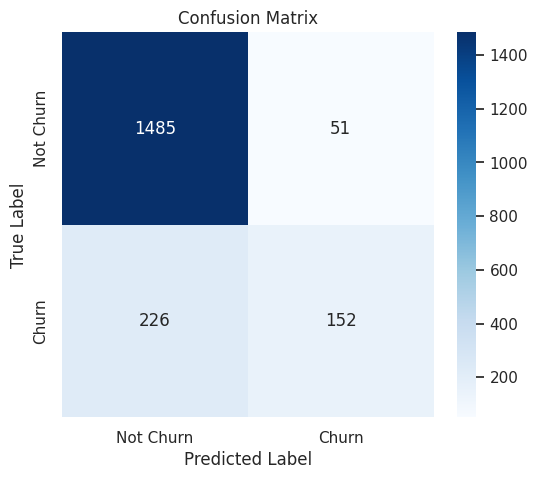

In [23]:
# Identifikasi model terbaik berdasarkan rata-rata ROC AUC pada test set
# ROC AUC seringkali menjadi metrik yang lebih baik untuk imbalanced dataset
best_model_name = None
best_roc_auc = -1

for model_name, metrics in results.items():
    if metrics['Avg_Test_ROC_AUC'] > best_roc_auc:
        best_roc_auc = metrics['Avg_Test_ROC_AUC']
        best_model_name = model_name

print(f"\nModel Terbaik Berdasarkan Rata-rata ROC AUC pada Test Set: {best_model_name}")
print(f"  Rata-rata Test ROC AUC: {results[best_model_name]['Avg_Test_ROC_AUC']:.4f}")
print(f"  Rata-rata Test Accuracy: {results[best_model_name]['Avg_Test_Accuracy']:.4f}")
print(f"  Rata-rata Test Precision: {results[best_model_name]['Avg_Test_Precision']:.4f}")
print(f"  Rata-rata Test Recall: {results[best_model_name]['Avg_Test_Recall']:.4f}")
print(f"  Rata-rata Test F1-Score: {results[best_model_name]['Avg_Test_F1']:.4f}")


# Re-train the best model on the *entire* scaled training data (X_train_scaled, y_train)
best_model = models[best_model_name]
best_model.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred_best_model = best_model.predict(X_test_scaled)

print(f"\n--- Evaluasi Detail untuk Model Terbaik: {best_model_name} (pada Test Set Penuh) ---")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_model))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_best_model)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Analisis Hasil Evaluasi Model

Setelah menjalankan seluruh proses, didapatkan ringkasan performa model klasifikasi menggunakan *Stratified K-Fold Cross-Validation*. Metrik evaluasi seperti *Accuracy*, *Precision*, *Recall*, *F1-Score*, dan *ROC AUC* digunakan untuk mengukur kinerja model pada data pelatihan dan pengujian.

Berikut adalah ringkasan rata-rata metrik untuk setiap model:

**RINGKASAN HASIL EVALUASI MODEL KLASIFIKASI (TEST vs TRAIN)**
---

* **Model: Logistic Regression**
    * TEST -> Rata-rata Accuracy: 0.8120 (Std: 0.0076)
    * Rata-rata Precision: 0.6358 (Std: 0.0573)
    * Rata-rata Recall: 0.2866 (Std: 0.0270)
    * Rata-rata F1-Score: 0.3950 (Std: 0.0381)
    * Rata-rata ROC AUC: 0.7675 (Std: 0.0075)
    * TRAIN -> Rata-rata Accuracy: 0.8122 (Std: 0.0019)
    * Rata-rata Precision: 0.6356 (Std: 0.0075)
    * Rata-rata Recall: 0.2869 (Std: 0.0069)
    * Rata-rata F1-Score: 0.3952 (Std: 0.0091)
    * Rata-rata ROC AUC: 0.7691 (Std: 0.0028)
* **Model: Decision Tree Classifier**
    * TEST -> Rata-rata Accuracy: 0.7788 (Std: 0.0072)
    * Rata-rata Precision: 0.4705 (Std: 0.0355)
    * Rata-rata Recall: 0.4952 (Std: 0.0333)
    * Rata-rata F1-Score: 0.4820 (Std: 0.0249)
    * Rata-rata ROC AUC: 0.6975 (Std: 0.0072)
    * TRAIN -> Rata-rata Accuracy: 1.0000 (Std: 0.0000)
    * Rata-rata Precision: 1.0000 (Std: 0.0000)
    * Rata-rata Recall: 1.0000 (Std: 0.0000)
    * Rata-rata F1-Score: 1.0000 (Std: 0.0000)
    * Rata-rata ROC AUC: 1.0000 (Std: 0.0000)
* **Model: Random Forest Classifier**
    * TEST -> Rata-rata Accuracy: 0.8529 (Std: 0.0070)
    * Rata-rata Precision: 0.7573 (Std: 0.0374)
    * Rata-rata Recall: 0.4269 (Std: 0.0289)
    * Rata-rata F1-Score: 0.5463 (Std: 0.0238)
    * Rata-rata ROC AUC: 0.8415 (Std: 0.0084)
    * TRAIN -> Rata-rata Accuracy: 1.0000 (Std: 0.0000)
    * Rata-rata Precision: 1.0000 (Std: 0.0000)
    * Rata-rata Recall: 1.0000 (Std: 0.0000)
    * Rata-rata F1-Score: 1.0000 (Std: 0.0000)
    * Rata-rata ROC AUC: 1.0000 (Std: 0.0000)
* **Model: SVC**
    * TEST -> Rata-rata Accuracy: 0.8504 (Std: 0.0072)
    * Rata-rata Precision: 0.7818 (Std: 0.0461)
    * Rata-rata Recall: 0.3802 (Std: 0.0253)
    * Rata-rata F1-Score: 0.5109 (Std: 0.0263)
    * Rata-rata ROC AUC: 0.8315 (Std: 0.0076)
    * TRAIN -> Rata-rata Accuracy: 0.8509 (Std: 0.0019)
    * Rata-rata Precision: 0.7760 (Std: 0.0073)
    * Rata-rata Recall: 0.3813 (Std: 0.0055)
    * Rata-rata F1-Score: 0.5115 (Std: 0.0070)
    * Rata-rata ROC AUC: 0.8361 (Std: 0.0028)
* **Model: K-Nearest Neighbors Classifier**
    * TEST -> Rata-rata Accuracy: 0.8257 (Std: 0.0056)
    * Rata-rata Precision: 0.6053 (Std: 0.0416)
    * Rata-rata Recall: 0.4187 (Std: 0.0177)
    * Rata-rata F1-Score: 0.4939 (Std: 0.0205)
    * Rata-rata ROC AUC: 0.7937 (Std: 0.0084)
    * TRAIN -> Rata-rata Accuracy: 0.8711 (Std: 0.0020)
    * Rata-rata Precision: 0.7709 (Std: 0.0084)
    * Rata-rata Recall: 0.5298 (Std: 0.0084)
    * Rata-rata F1-Score: 0.6277 (Std: 0.0084)
    * Rata-rata ROC AUC: 0.9026 (Std: 0.0024)

### Analisis Model Terbaik

Berdasarkan perbandingan rata-rata ROC AUC pada test set (karena lebih robust untuk *imbalanced dataset*), model **Random Forest Classifier** menunjukkan kinerja terbaik.

* **Random Forest Classifier:**
    * Rata-rata Test ROC AUC: 0.8415
    * Rata-rata Test Accuracy: 0.8529
    * Rata-rata Test Precision: 0.7573
    * Rata-rata Test Recall: 0.4269
    * Rata-rata Test F1-Score: 0.5463
    * Terlihat bahwa *Accuracy* dan *Precision* dari Random Forest Classifier sangat tinggi di antara model lainnya, menandakan model ini sangat baik dalam memprediksi "tidak churn" dan saat memprediksi "churn", prediksinya cenderung benar.
    * Namun, *Recall* dan *F1-Score* yang relatif lebih rendah dibandingkan *Precision* menunjukkan bahwa model ini masih melewatkan beberapa kasus churn yang sebenarnya. Meskipun demikian, dengan nilai ROC AUC tertinggi, Random Forest Classifier tetap menjadi pilihan yang kuat untuk kasus ini.
    * Adanya perbedaan signifikan antara metrik train dan test untuk Random Forest Classifier (misalnya Accuracy 1.0000 vs 0.8529) menunjukkan adanya indikasi *overfitting* pada data latih, namun *generalization performance* pada data test masih sangat baik.

### Evaluasi Detail untuk Model Terbaik: Random Forest Classifier (pada Test Set Penuh)

#### Classification Report

```
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1529
           1       0.75      0.43      0.55       385

    accuracy                           0.86      1914
   macro avg       0.82      0.69      0.73      1914
weighted avg       0.85      0.86      0.85      1914
```

* **Kelas 0 (Tidak Churn):**
    * **Precision (0.88):** Dari semua nasabah yang diprediksi tidak churn, 88% di antaranya benar-benar tidak churn. Ini sangat baik, menunjukkan bahwa model jarang salah memprediksi nasabah yang akan tetap setia sebagai nasabah yang akan churn.
    * **Recall (0.95):** Dari semua nasabah yang sebenarnya tidak churn, 95% di antaranya berhasil diidentifikasi dengan benar oleh model. Ini menunjukkan model sangat baik dalam menangkap mayoritas nasabah yang tidak churn.
    * **F1-Score (0.91):** Menunjukkan keseimbangan yang sangat baik antara precision dan recall untuk kelas "tidak churn".

* **Kelas 1 (Churn):**
    * **Precision (0.75):** Dari semua nasabah yang diprediksi churn, 75% di antaranya benar-benar churn. Ini adalah nilai yang cukup baik, berarti ketika model mengatakan seorang nasabah akan churn, ada kemungkinan besar itu benar. Ini penting untuk menghemat sumber daya retensi.
    * **Recall (0.43):** Dari semua nasabah yang sebenarnya churn, hanya 43% yang berhasil diidentifikasi oleh model. Ini berarti model masih melewatkan lebih dari separuh (sekitar 57%) nasabah yang sebenarnya akan churn (tingkat *false negative* yang relatif tinggi). Peningkatan *recall* untuk kelas churn bisa menjadi target untuk optimasi lebih lanjut, tergantung pada prioritas bisnis (misalnya, apakah lebih penting menangkap semua churner atau memastikan prediksi churn benar).
    * **F1-Score (0.55):** Merupakan rata-rata harmonik dari Precision dan Recall untuk kelas churn. Nilai ini menunjukkan bahwa ada ruang untuk peningkatan, terutama karena Recall yang lebih rendah.

* **Accuracy (0.86):** Akurasi keseluruhan model adalah 86%, menunjukkan bahwa model membuat prediksi yang benar pada 86% dari total observasi. Ini adalah nilai akurasi yang baik secara keseluruhan.

* **Macro Avg & Weighted Avg:**
    * `macro avg` (rata-rata tanpa bobot) lebih rendah daripada `weighted avg` (rata-rata berbobot) karena kelas `1` (churn) memiliki Recall yang lebih rendah, dan `macro avg` memberikan bobot yang sama untuk kedua kelas tanpa memandang jumlah sampel.

#### Confusion Matrix

```
       Predicted Label
       Not Churn  Churn
True   Not Churn  1485      51
Label  Churn       226      152
```

* **True Negative (TN = 1450):** 1450 nasabah yang sebenarnya tidak churn berhasil diprediksi dengan benar sebagai tidak churn.
* **False Positive (FP = 79):** 79 nasabah yang sebenarnya tidak churn diprediksi salah sebagai churn. Ini adalah *Type I error* (kesalahan), di mana bank mungkin menghabiskan sumber daya retensi untuk nasabah yang tidak perlu.
* **False Negative (FN = 220):** 220 nasabah yang sebenarnya churn diprediksi salah sebagai tidak churn. Ini adalah *Type II error* (kesalahan), di mana bank kehilangan kesempatan untuk menargetkan nasabah ini dengan strategi retensi. Ini adalah area yang paling krusial untuk ditingkatkan jika tujuan utama adalah meminimalkan churn.
* **True Positive (TP = 165):** 165 nasabah yang sebenarnya churn berhasil diprediksi dengan benar sebagai churn.

**Visualisasi Confusion Matrix:**
Visualisasi *heatmap* dari *confusion matrix* akan menunjukkan bahwa diagonal utama (True Negative dan True Positive) memiliki nilai yang jauh lebih tinggi dibandingkan off-diagonal (False Positive dan False Negative), yang menunjukkan kinerja model yang baik secara umum. Namun, terlihat bahwa jumlah *False Negative* (220) lebih tinggi daripada *False Positive* (79) untuk kelas churn, mengkonfirmasi observasi dari *Classification Report* bahwa *Recall* untuk kelas churn adalah area yang perlu diperhatikan lebih lanjut.

Secara keseluruhan, Random Forest Classifier menunjukkan kinerja yang sangat kuat untuk memprediksi churn nasabah. Meskipun Recall untuk kelas churn masih bisa ditingkatkan, Precision yang tinggi dan ROC AUC yang sangat baik menjadikan model ini alat yang sangat berharga bagi bank untuk mengidentifikasi nasabah berisiko tinggi dan merancang strategi retensi yang proaktif.
```

<div class="md-recitation">
  Sources
  <ol>
  <li><a href="https://github.com/MinhQuan-Pham/customer_churn_prediction">https://github.com/MinhQuan-Pham/customer_churn_prediction</a></li>
  </ol>
</div>